## Group No 71

## Group Member Names:
1. Saurabh Arunrao Dhande (2021fc04700)

# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

1.What is the problem that you are trying to solve?
-> Breast Cancer classification problem. From given data set user has to classify which type of cancer has been ocurred in a patient ie. (M = malignant, B = benign)

2.What kind of prediction (classification / regression) task are you performing?
->  Classifcation Problem

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [136]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
from sklearn.model_selection import train_test_split
#import mpld3 as mpl
#
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [137]:
# load dataset
df = pd.read_csv("data_breast.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.2 Code for converting the above downloaded data into a form suitable for DL 

## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

In [138]:
df.shape

(569, 32)

In [139]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [141]:
df.drop('id',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [142]:
df.isnull().values.any()

False

In [143]:
df.duplicated().values.any()

False

## 3.2 Encode categorical data

In [144]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [145]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3.3 Normalize the data

In [146]:
df_min_max_norm = df.copy()
  
# apply normalization techniques
for column in df_min_max_norm.columns:
    df_min_max_norm[column] = df_min_max_norm[column]  / df_min_max_norm[column].abs().max()
      
# view normalized data
display(df_min_max_norm)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,...,0.704218,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012
1,1.0,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,...,0.693396,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012
2,1.0,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,...,0.653996,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072
3,1.0,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,...,0.413707,0.534921,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735
4,1.0,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,...,0.625416,0.336496,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.766987,0.570010,0.753316,0.591363,0.679315,0.335553,0.571462,0.690358,0.567763,...,0.706160,0.532903,0.661226,0.476493,0.633423,0.199716,0.328035,0.761512,0.310334,0.342892
565,1.0,0.716115,0.719196,0.696021,0.504198,0.598531,0.299363,0.337395,0.486630,0.576316,...,0.657325,0.772103,0.617038,0.406911,0.523810,0.181664,0.256789,0.559450,0.387466,0.319855
566,1.0,0.590537,0.714868,0.574536,0.343103,0.517442,0.296178,0.216753,0.263519,0.523026,...,0.526637,0.688736,0.504379,0.264222,0.511680,0.292439,0.271805,0.487285,0.334137,0.376867
567,1.0,0.732835,0.746690,0.743236,0.505798,0.720930,0.801969,0.823336,0.755467,0.788487,...,0.714206,0.795721,0.734873,0.428068,0.741240,0.820510,0.749760,0.910653,0.615697,0.597590


## 3.4 Feature Engineering 

if any

In [147]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [148]:
df_target = df['diagnosis']
df_target.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

In [149]:
df_target.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## 3.6 Split the data into training set and testing set

In [150]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_min_max_norm, df_target, test_size=0.3, random_state=0)


In [151]:
print("X_tran : ",X_train.shape)
print("y_tran : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_tran :  (398, 31)
y_tran :  (398,)
X_test :  (171, 31)
y_test :  (171,)


## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

##---------Type the answer below this line------------------##

* to remove duplicate data, if present 
-> Duplcate data is not present
* to impute or remove missing data, if present
-> No missing values
* to remove data inconsistencies, if present
-> No inconsistencies present in the data
* to encode categorical data
-> Categorical data is available and it has been encoded refer below code
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()
* the normalization technique used
-> We have used min max normaliation technique for normalization
* Report the size of the training dataset and testing dataset
X_tran :  (398, 31)
y_tran :  (398,)
X_test :  (171, 31)
y_test :  (171,)


# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [152]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=31))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               4096      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

##---------Type the answer below this line------------------##

* Number of layers
-> 2
* Number of units in each layer
-> 1 st layer has 128 units
2nd layer has 1 unit
* Activation function used in each hidden layer
->  Rectified Linear Activation Function or ReLU 
* Activation function used in the output layer
-> As this is a binary classifcation model so we have used "Sigmoid" as aactivation function
* Total number of trainable parameters 
-> 31

# 5. Training the model


## 5.1 Configure the training and  Train the model

Configure  the model for training, by using appropriate optimizers and regularizations



In [153]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)


Epoch 1/10
4/4 [==============================] - 0s 79ms/step - loss: 0.6633 - accuracy: 0.3869 - val_loss: 0.6344 - val_accuracy: 0.7076
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6129 - accuracy: 0.9146 - val_loss: 0.5904 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.5731 - accuracy: 1.0000 - val_loss: 0.5551 - val_accuracy: 0.9942
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 0.5384 - accuracy: 1.0000 - val_loss: 0.5252 - val_accuracy: 0.9942
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.5093 - accuracy: 1.0000 - val_loss: 0.4970 - val_accuracy: 0.9942
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.4806 - accuracy: 1.0000 - val_loss: 0.4690 - val_accuracy: 0.9883
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.4529 - accuracy: 1.0000 - val_loss: 0.4426 - val_accuracy: 0.9883
Epoch 8/10
4/4 [============

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answers below this line------------------##

This is binary classifictaion probelem soto get better accuracy we have used Sigmoid activation function in output layer and 
relu activation fuction in the middle layer. As dataset size is low and contain around 600 rows so we have used 2 layer NN model.Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of parameters.Here we have  used binary_crossentropy loss fuction as this is a binary classification problem.

# 6. Test the model

Score: 2 Marks

In [154]:
from sklearn.metrics import confusion_matrix
 
y_pred = model.predict(X_test) > 0.5

## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

[]

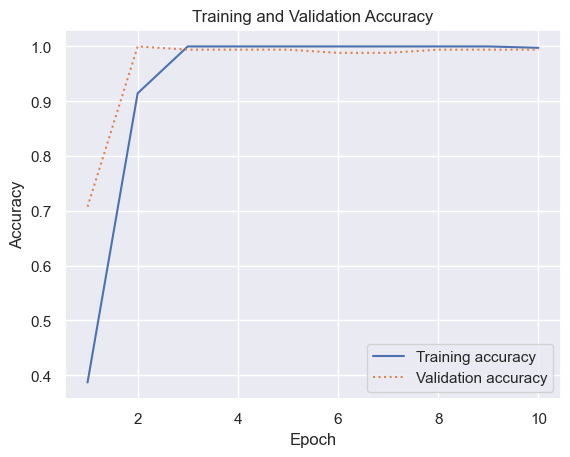

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(110.44999999999997, 0.5, 'Actual label')

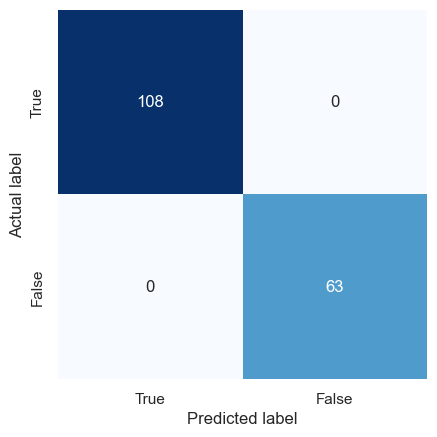

In [156]:
mat = confusion_matrix(y_test, y_predicted)
labels = ['True', 'False']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [157]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 1.000
Recall: 0.984
Accuracy: 0.994
F1 Score: 0.992


## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

##---------Type the answers below this line------------------##

1.One of the common challnege I have faced is that installation of libariries in to the system so that required code should run.
2.I was not able to download data form internet so I have downloaded file and used in the file.
3.I have god hands on eperience on Deep learning problem.
4.The problem which I have selected is a binary classification problem and as this is the binary classifiction problem then I have decided to use "sigmoid" activation function in the output layer.

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck